# 라이브러리 및 데이터 불러오기기

In [1]:
import pandas as pd # 판다스 라이브러리 임포트
file_url = 'https://raw.githubusercontent.com/Berry-G/STUDY/main/Machine_learning/Jupyter%20Notebook%2C%20colab/titanic.csv'
data = pd.read_csv(file_url)

# 데이터 확인하기

In [2]:
data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0
...,...,...,...,...,...,...,...,...,...
884,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,S,0
885,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,S,1
886,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,S,0
887,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,C,1


In [4]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0


In [6]:
# 모든 변수의 빈 값(결측치)이 없음(Non-null Count)
data.describe()

,Pclass,Age,SibSp,Parch,Survived
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,29.315152,0.524184,0.382452,0.382452
std,0.834700,12.984932,1.103705,0.806761,0.486260
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,1.000000


In [7]:
# 상관관계 : 두 변수 간의 변화가 서로 연관되었을 때 관계를 보여줌
# A가 증가할 수록 B가 감소하거나, 반대의 경우
data.corr()

# 1혹은 -1에 가까울수록 상관관계가 크다.
# 0에 가까울 수록 상관관계가 없다.

,Pclass,Age,SibSp,Parch,Survived
Pclass,1.000000,-0.336512,0.081656,0.016824,-0.335549
Age,-0.336512,1.000000,-0.232543,-0.171485,-0.069822
SibSp,0.081656,-0.232543,1.000000,0.414542,-0.034040
Parch,0.016824,-0.171485,0.414542,1.000000,0.083151
Survived,-0.335549,-0.069822,-0.034040,0.083151,1.000000


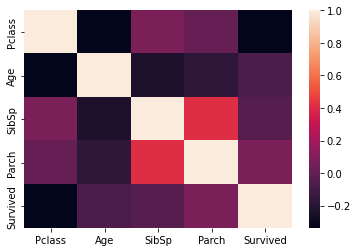

In [8]:
import matplotlib as pit
import seaborn as sns

sns.heatmap(data.corr())

- heatmap 우측에 색상이 의미하는 값
- 상관관계 강도를 절대값 기준으로 해석
- 0을 기준으로 대칭이 되는 색상 배열을 사용하는게 좋음
- => 색상을 변경하는 매개변수 추가

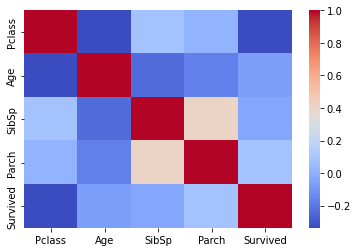

In [10]:
sns.heatmap(data.corr(), cmap='coolwarm')

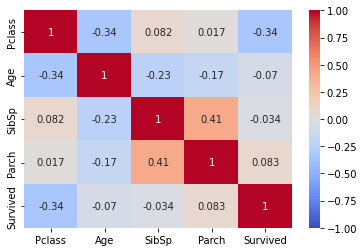

In [12]:
sns.heatmap(data.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True)
# 빨간색에 가까울수록 상관관계가 높다.

# 전처리 : 변수 변환하기 (더미 변수아 원-핫 인코딩)
- 피처(독립 변수) 엔지니어링에 해당
- 피처엔지니어링은 머신러닝에 있어서 매우 중요
- 기본적으로 머신러닝 알고리즘에서는 문자열로 된 데이터를 이해하지 못함
- object 컬럼들을 숫자 데이터로 변환하는 기능
- 특정 문자를 숫자로 대처하는 경우에 수치의 크고 작음은 아무런 의미가 없음 (상대적 서열 무의미)
- 위의 무제를 해결하기 위해 더미(dummy) 변수를 만들어 활용함
- 변수의 값을 변수로 변환(one-hot 인코딩)
- 변수에 해당하면 1, 해당하지 않으면 0을 숫자로 채움(문자로 된 값을 숫자화하여 이해할 수 있게 만듦)

In [13]:
# Name, Sex, Ticket, Embarked
data['Name'].nunique()    # 이름에 따라서 사망 여부가 갈린다는 추론은 어렵다.

889

In [14]:
data['Sex'].nunique()

2

In [15]:
data['Ticket'].nunique()

680

In [16]:
data['Embarked'].nunique()

3

In [18]:
# 두 object 형을 원-핫 인코딩으로 전처리하기
# 우선 drop() 함수를 이용하여 두 변수 제거
data = data.drop(['Name', 'Ticket'], axis = 1)
data

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,male,22.0,1,0,S,0
1,1,female,38.0,1,0,C,1
2,3,female,26.0,0,0,S,1
3,1,female,35.0,1,0,S,1
4,3,male,35.0,0,0,S,0
...,...,...,...,...,...,...,...
884,2,male,27.0,0,0,S,0
885,1,female,19.0,0,0,S,1
886,3,female,28.0,1,2,S,0
887,1,male,26.0,0,0,C,1


In [20]:
pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

,Pclass,Age,SibSp,Parch,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,1,0,1
1,1,38.0,1,0,1,0,0,0
2,3,26.0,0,0,1,0,0,1
3,1,35.0,1,0,1,0,0,1
4,3,35.0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...
884,2,27.0,0,0,0,1,0,1
885,1,19.0,0,0,1,0,0,1
886,3,28.0,1,2,0,0,0,1
887,1,26.0,0,0,1,1,0,0


# 모델링 및 예측하기
- 모델링 하기 전 독립변수, 종속변수, 훈련셋, 테스트셋으로 나누어 준비하기

In [21]:
from sklearn.model_selection import train_test_split
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100) #학습셋, 시험셋